In [1]:
# For NLTK resources
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# Data handling
import pandas as pd
import numpy as np

# Text preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [3]:
# Machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# File handling
from zipfile import ZipFile

In [5]:
# 2️⃣ Unzip your datasets inside Colab
# -----------------------------------------
with ZipFile('/content/Fake.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

with ZipFile('/content/True.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

print("✅ Files unzipped successfully.")

✅ Files unzipped successfully.


In [6]:
# 3️⃣ Load and merge datasets
# -----------------------------------------
fake_df = pd.read_csv('/content/Fake.csv')
true_df = pd.read_csv('/content/True.csv')

# Add labels
fake_df['label'] = 1  # 1 = Fake
true_df['label'] = 0  # 0 = Real

In [7]:
# Combine into one DataFrame
news_df = pd.concat([fake_df, true_df], axis=0).reset_index(drop=True)
print(f"✅ Combined dataset shape: {news_df.shape}")
print(news_df.head())

✅ Combined dataset shape: (44898, 5)
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      1  
1  December 31, 2017      1  
2  December 30, 2017      1  
3  December 29, 2017      1  
4  December 25, 2017      1  


In [8]:
# 4️⃣ Data cleaning and handling nulls
# -----------------------------------------
print("\nNull value count before cleaning:")
print(news_df.isnull().sum())

news_df = news_df.fillna(' ')

print("\nNull value count after cleaning:")
print(news_df.isnull().sum())


Null value count before cleaning:
title      0
text       0
subject    0
date       0
label      0
dtype: int64

Null value count after cleaning:
title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [10]:
news_df['content'] = news_df['title'] + ' ' + news_df['text']


In [11]:
# 6️⃣ Stemming: Preprocessing text data
# -----------------------------------------
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def stemming(content):
    # Remove non-alphabet characters
    content = re.sub('[^a-zA-Z]', ' ', content)
    # Convert to lowercase
    content = content.lower()
    # Tokenize
    words = content.split()
    # Remove stopwords and apply stemming
    stemmed_words = [ps.stem(word) for word in words if word not in stop_words]
    # Rejoin into a single string
    return ' '.join(stemmed_words)

# Apply stemming to content
news_df['content'] = news_df['content'].apply(stemming)
print("\n✅ Stemming applied. Sample processed content:")
print(news_df['content'].head())


✅ Stemming applied. Sample processed content:
0    donald trump send embarrass new year eve messa...
1    drunk brag trump staffer start russian collus ...
2    sheriff david clark becom internet joke threat...
3    trump obsess even obama name code websit imag ...
4    pope franci call donald trump christma speech ...
Name: content, dtype: object


In [12]:
# 7️⃣ Preparing features and labels
# -----------------------------------------
X = news_df['content'].values
y = news_df['label'].values

print(f"\n✅ Feature and label preparation complete.\nFeatures shape: {X.shape}\nLabels shape: {y.shape}")



✅ Feature and label preparation complete.
Features shape: (44898,)
Labels shape: (44898,)


In [13]:
# 8️⃣ TF-IDF Vectorization
# -----------------------------------------
vectorizer = TfidfVectorizer(max_features=5000)
vectorizer.fit(X)
X_tfidf = vectorizer.transform(X)

print(f"\n✅ TF-IDF Vectorization complete.\nShape after vectorization: {X_tfidf.shape}")


✅ TF-IDF Vectorization complete.
Shape after vectorization: (44898, 5000)


In [14]:
# 9️⃣ Train-Test Split
# -----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, stratify=y, random_state=42)

print(f"\n✅ Train-Test split complete.\nTraining set size: {X_train.shape}\nTest set size: {X_test.shape}")


✅ Train-Test split complete.
Training set size: (35918, 5000)
Test set size: (8980, 5000)


In [15]:
# 🔟 Model Training using Random Forest
# -----------------------------------------
model = RandomForestClassifier(
    n_estimators=200,          # Number of trees
    max_depth=None,            # No max depth (grow fully)
    random_state=42,
    n_jobs=-1,                 # Use all CPU cores
    verbose=1
)

model.fit(X_train, y_train)
print("\n✅ Model training complete.")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min



✅ Model training complete.


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.0min finished


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   10.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:   10.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.



Training Accuracy: 1.0000


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    2.9s finished


Test Accuracy: 0.9980

Classification Report:
              precision    recall  f1-score   support

        Real       1.00      1.00      1.00      4284
        Fake       1.00      1.00      1.00      4696

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



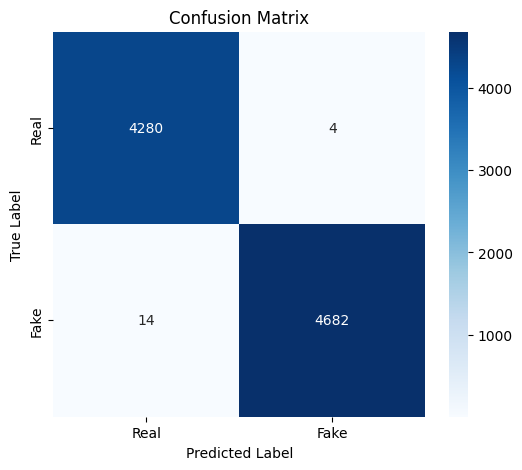

In [16]:
# 1️⃣1️⃣ Model Evaluation
# -----------------------------------------
# Training accuracy
y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"\nTraining Accuracy: {train_acc:.4f}")

# Test accuracy
y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=["Real", "Fake"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# 1️⃣2️⃣ Testing on a Single News Example
# -----------------------------------------
test_idx = 20  # change index as needed
single_news = X_test[test_idx]
pred = model.predict(single_news)

print("\nTesting a single news sample:")
print(f"Prediction: {'Fake News' if pred[0]==1 else 'Real News'}")
print(f"Actual: {'Fake News' if y_test[test_idx]==1 else 'Real News'}")


Testing a single news sample:
Prediction: Fake News
Actual: Fake News


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished


In [19]:


# Example news headline and body
example_title = "NASA Announces Discovery of Earth-like Planet Orbiting Nearby Star"
example_text = """NASA scientists have announced the discovery of an Earth-like planet orbiting a nearby star,
which may have conditions suitable for life. The planet is located in the habitable zone and shows promising data."""

# Combine for consistency
example_content = example_title + ' ' + example_text

# Apply the same preprocessing pipeline: stemming
example_content_processed = stemming(example_content)

# Transform using the fitted TF-IDF vectorizer
example_vector = vectorizer.transform([example_content_processed])

# Predict using the trained model
prediction = model.predict(example_vector)

# Display result
print("\n📰 **Example News:**", example_title)
if prediction[0] == 0:
    print(" Prediction: The news is **Real**.")
else:
    print(" Prediction: The news is **Fake**.")



📰 **Example News:** NASA Announces Discovery of Earth-like Planet Orbiting Nearby Star
 Prediction: The news is **Fake**.


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
